In [ ]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import this

# Software Notes 3 - SLR Error Assumptions

Prepared for ISyE 4031 <br>
Brandon Kang <br>
brandonkang@gatech.edu

**These software notes provide some proofs and explanations of SLR error assumptions. These serve merely as supplementary material to give you intuition behind why these error assumptions are crucial, so if you are just looking for code, feel free to skip to "Check Mean of Residuals."**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import anderson
jtplot.style(theme='onedork')

## Implementation of SLR 

In [2]:
dfGPA = pd.read_csv("gpa.csv")
dfGPA.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
model = ols("GPA~SAT", data=dfGPA).fit() #note that there are 2 OLS in statsmodels; I'm using this one to produce ANOVA results
model.summary() #model output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           7.20e-11
Time:                        12:43:10   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Least Squares as MLE 

**NOTE: This section is just for your learning and will give you some intuition behind why the assumptions we use for linear regression are so important. You are not expected to know how to derive the proof below.**

As I alluded in the first software notes, I mentioned that least squares is the best method to use when the error terms follow a specified distribution. This lead to some nice properties that the parameters are unbiased and minimizes the variance of the errors. It also turns out that least squares is a convex optimization problem that gives us a closed-form solution. Here, I will show that the least squares estimates for $\beta$ is actually equivalent to producing the maximum likelihood estimates for $\beta$ under a *very important assumption.*

### Derivation of Least Squares

In this proof, I will show that the least squares estimate is equivalent to a *maximum likelihood estimator* when $\epsilon_i \sim N(0, \sigma^2) $. Recall that MLE is a method to estimate the parameters of a distribution by maximizing some likelihood function. Think of this intuitively as finding parameters that will maximize the probability of the model with some parameters generating the data that was actually observed. Recall that $y_i=\beta x_i+\epsilon_i$ for a no-intercept model. I'm doing a no-intercept model here to simplify computation without an added term. Note that the *only* source of randomness here is from $\epsilon_i$, so we can rewrite this as $\epsilon_i=y_i-\beta x_i$. We can then write our likelihood function, which is the pdf for $\epsilon_i$. Note that this is just the pdf of the Gaussian distribution.

$$
\begin{align}
f(x_i|\beta,\sigma^2)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left(\frac{-(y_i-\beta x_i)^2}{2\sigma^2}\right)
\end{align}
$$

The above formulation is the pdf for a *single* observation, but we need to extend this to $N$ observations. Let $X$ be a column vector with $n$ rows/observations.
$$
\begin{align}
l(X|\beta,\sigma^2) &= \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}}\exp\left(\frac{-(y_i-\beta x_i)^2}{2\sigma^2}\right) \\
&=\left(\frac{1}{\sigma\sqrt{2\pi}}\right)^N  \prod_{i=1}^N\exp\left(\frac{-(y_i-\beta x_i)^2}{2\sigma^2}\right)
\end{align}
$$

We will now take the log-likelihood. Note that we can take the log since the log function is monotonically increasing, so we will have the same conclusions with log-likelihood as doing normal likelihood. Also, it simplifies the computation significantly.

$$
\begin{align}
\log l(X|\beta,\sigma^2) &= N\log\left(\frac{1}{\sigma\sqrt{2\pi}}\right) + \sum_{i=1}^N\log\left(\exp\left(\frac{-(y_i-\beta x_i)^2}{2\sigma^2}\right) \right) \\
&= N\log\left(\frac{1}{\sigma\sqrt{2\pi}}\right) - \frac{1}{2\sigma^2}\sum_{i=1}^N (y_i-\beta x_i)^2
\end{align}
$$

Now let's complete the MLE formulation.
$$
\begin{align}
& \text{argmax}_\beta \; \log l(X|\beta,\sigma^2)  \\
&= \text{argmax}_\beta \; N\log\left(\frac{1}{\sigma\sqrt{2\pi}}\right) - \frac{1}{2\sigma^2}\sum_{i=1}^N (y_i-\beta x_i)^2 \\
&= \text{argmax}_\beta \; -\sum_{i=1}^N (y_i-\beta x_i)^2 \\
&= \text{argmin}_\beta  \;  \sum_{i=1}^N (y_i-\beta x_i)^2
\end{align}
$$

This tells us that in order to find the parameters that *maximize the log likelihood*, we have to find parameters that *minimize the sum of squared errors* (since there is a negative sign in front of the summation), which was derived in class! Note that the first term as well as the constant factor in the second term, $\frac{1}{2\sigma^2}$ in the log likelihood function does not depend on our parameters, so we can ignore this term when taking the argmax. We can now derive for our estimator, $\hat{\beta_{MLE}}$ by differentiating.

$$
\begin{align}
\frac{\partial \log l(X|\beta,\sigma^2) }{\partial \beta} &= 0 \\
\sum_{i=1}^N x_i(y_i-\beta x_i) &= 0 \\
\sum_{i=1}^N x_iy_i - \beta\sum_{i=1}^N x_i^2 &= 0 \\
\hat{\beta_{MLE}} = \frac{\sum_{i=1}^N x_iy_i}{\sum_{i=1}^N x_i^2}
\end{align}
$$

Now you should be able to see that $\hat{\beta_{MLE}}$ is equivalent to our $\hat{\beta}$ when minimizing least squares for a no-intercept model. From the MLE formulation, we have also proved that in order to *maximize the log likelihood*, we have to *minimize the sum of squared errors*. This in of itself is powerful, but it also gives us more intuition and support behind why we use least squares when computing our parameter estimates. This should also show you why it's incredibly important to have our assumption that $\epsilon_i \sim N(0, \sigma^2)$ met in order to use the solutions for the parameter estimates, as our proof was derived from this fundamental assumption. If not, then our regression model may produce poor predictions, and the proof would not follow. You can try to extend this to SLR with an intercept as well and reach the same conclusion.

### Assumptions to Check

One fundamental assumption of using ordinary least squares that we've shown is that the error terms are white noise, $\epsilon_i \sim N(0,\sigma^2$). This essentially means that we need to check 3 things:
1. The mean of the residuals must equal to 0
2. The residuals must be derived from the same family of distribution (Gaussian)
3. The residuals must be derived from the same family of distribution with a constant variance, $\sigma^2$

For (1), we can simply compute the mean of residuals. <br>
For (2), we can plot a normality plot and conduct an Anderson-Darling test. <br>
For (3), we can plot residuals vs. fitted values plot and obseve if there is or is not a pattern. <br>

Another fundamental assumption that the error terms are independent. We can check the residuals vs. observation order to see if the error terms are correlated with each other.

## Check Mean of Residuals

In [4]:
residuals = model.resid
print("Mean of residuals is " + str(np.mean(residuals)))

Mean of residuals is -8.458842092382145e-17


As you can observe below, the mean of residuals is very close to 0, so we proceed in concluding that the mean of residuals is in fact 0.

## Check the Family of Distribution of Residuals 

Note that the below histogram looks fairly normal and centered around 0, and the normality plot seems like the points fall along the line, which implies that the residuals may follow a normal distribution. However, in order to be more concise in our conclusions, we will need to conduct a hypothesis test to confirm our observations.

We will use the Anderson-Darling test in order to test for normality. There are other tests that you can use to test for normality, such as Kolmogorov–Smirnov test, but we will use Anderson-Darling test for now. The Anderson-Darling test is a modification of the K-S test that gives more weights to the tails and makes use of the specified distribution (in our case Gaussian/Normal) when computing the critical values. Note that we are conducting the following hypothesis test:

$$
\begin{align}
H_0&: \text{Residuals follow a Gaussian distribution}\\
H_1&: \text{Residuals do not follow a Gaussian distribution}
\end{align}
$$

As always, if our test statistic is greater than our critical value at a specified significance level (or p-value is less than $\alpha$), we will reject $H_0$ and conclude that the residuals do $not$ follow a normal distribution, and the normality assumption is *violated.* However, if our test statistic is less than our critical value (or p-value is greater than $\alpha$), we will fail to reject $H_0$ and conclude that the normality assumption is not violated.

Text(0.5, 1.0, 'Histogram of Residuals')

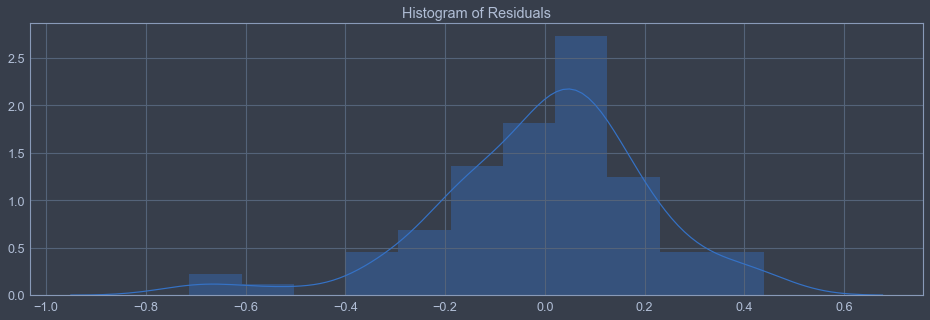

In [5]:
plt.figure(figsize=(16, 5))
sns.distplot(residuals)
plt.title("Histogram of Residuals")

Text(0.5, 1.0, 'Normality Plot of Residuals')

<Figure size 1080x576 with 0 Axes>

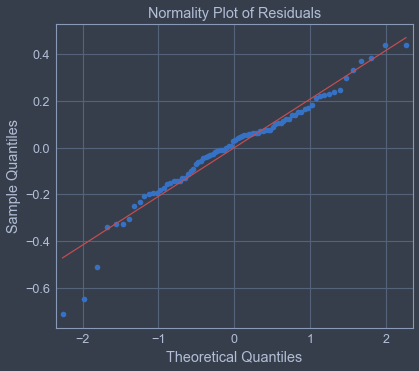

In [6]:
fig = plt.figure(figsize=(15, 8))
resPlot = sm.ProbPlot(residuals)
fig = resPlot.qqplot(line="s")
plt.title("Normality Plot of Residuals")

In [7]:
normalityTest = anderson(residuals)
print("Test statistic is: " + str(np.round(normalityTest.statistic, 3)))
for i in range(len(normalityTest.significance_level)):
    print(str(normalityTest.significance_level[i]) + "%: " + str(normalityTest.critical_values[i] ) +
          (" Normal" if normalityTest.statistic<normalityTest.critical_values[i] else " Not Normal"))

Test statistic is: 0.84
15.0%: 0.552 Not Normal
10.0%: 0.628 Not Normal
5.0%: 0.754 Not Normal
2.5%: 0.879 Normal
1.0%: 1.046 Normal


Note that the implementation above does not give the p-value, but since it does give the critical values at each significance level, you can still make the appropriate conclusions.

StatsModels does have an implementation for AD test for testing normality that returns a p-value, but it does not allow you to specify significance levels.

## Check Constant Variance from Residuals vs. Fitted Values

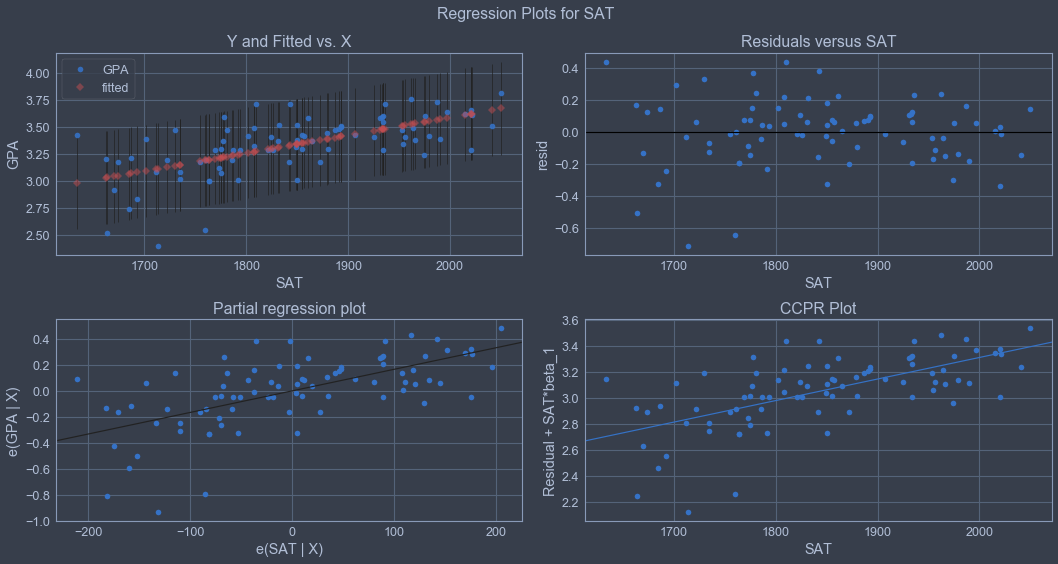

In [8]:
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, "SAT", fig=fig)

**Top left:** Regression plot that gives fitted values from the regression equation. <br>
**Top right:** Residuals vs fitted values plot. If you recognize a pattern in the plot, then there is a violation of the constant variance assumption, and thus the distribution of the error terms do not follow the same distribution.

For now, do not worry about the bottom two plots. These are more relevant once we delve into multiple linear regression, and they are not required outputs.

## Check Independence of Residuals

Text(0.5, 1.0, 'Residuals vs. Observation Order')

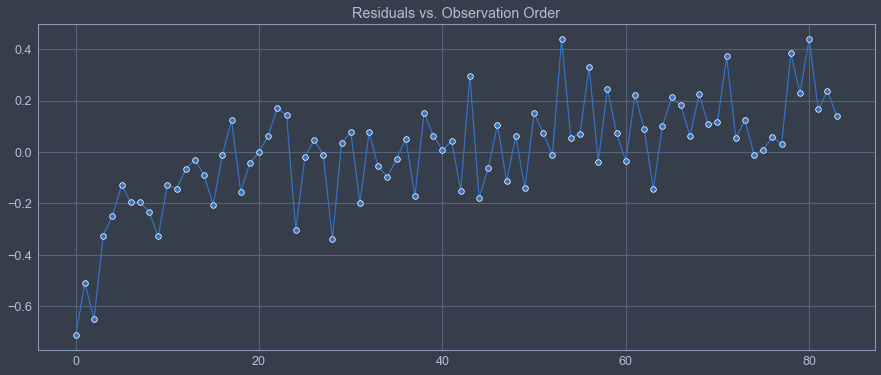

In [9]:
plt.figure(figsize=(15, 6))
sns.lineplot(residuals.index, residuals, marker="o")
plt.title("Residuals vs. Observation Order")

Here, we plot the index of the Series of residuals against the values of the residuals. Essentially, we are checking the first-order autocorrelation, seeing if each consecutive residuals are correlated. If you see a pattern in the plot, then the independence assumption may be violated. We will use a statistical test for independence later on, referred to as the Durbin-Watson test, in order to check for first-order autocorrelation and a potential violation of the independence assumption.

## Preface to Multiple Linear Regression 

Everything we've done so far has been restricted to one variable against one response. We will extend the regression framework to capture dependencies between multiple variables against the response. For example, when predicting the GPA of a student, more factors can go into account than just an SAT score like how long a student studies weekly. In reality, there are probably more than one variable that affects your response, so multiple linear regression can make more sense.

Multiple linear regression uses the same assumptions and the same loss function. However, we will use matrix notation here since now we're dealing with multiple variables.

$$
\begin{align}
X \; &\epsilon \; \mathbb{R}^{nx(p+1)} \\
\beta \; &\epsilon \; \mathbb{R}^{(p+1)x1} \\
\hat{y} &= X\beta
\end{align}
$$

Above, we define $X$ as a matrix that has $n$ rows for the number of observations or data points and $p+1$ columns. $\beta$ is defined as having $p+1$ rows for the constant and $p$ variables and 1 column. The reason for the dimensions of $X$ is that we will fill the first column with $1$'s in order to account for an intercept or the constant term. When we compute the matrix multiplication between $X$ and $\beta$, we are then able to add the constant term like we did in SLR. Also note that the inner dimensions match, and we are returned with a $nx1$ matrix for our output.

In the next software notes, I will go into the optimization problem for Multiple Linear Regression and some implications that arrive when we are now dealing with higher dimensional data. I will also solve the optimization problem by deriving the gradient and Hessian. There are certain limitations of using the closed-form solution that we will discuss in the next software notes as well, which are more common with higher dimensional datasets.